In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
train_df = pd.read_json("train.json")
#train_df

In [3]:
print("Train Rows : ", train_df.shape[0])

('Train Rows : ', 49352)


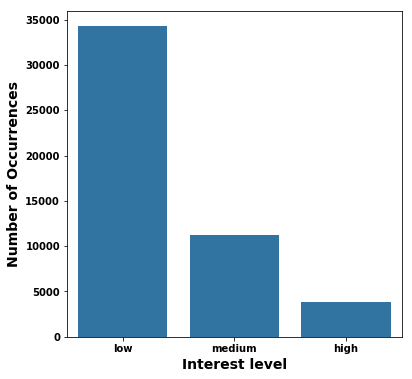

In [4]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(int_level.index, int_level.values, alpha=1, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.xlabel('Interest level', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

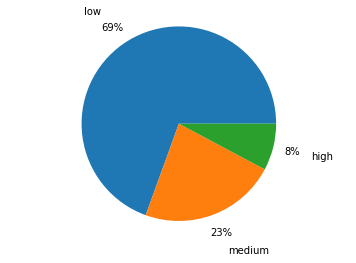

In [5]:
plt.pie(int_level.values,(0,0,0),int_level.index, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.show()

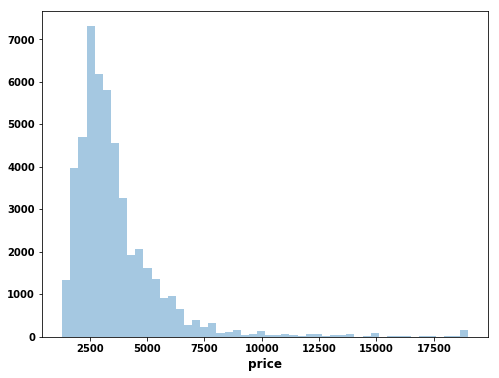

In [6]:
llimit_p = np.percentile(train_df.price.values, 0.3)
ulimit_p = np.percentile(train_df.price.values, 99.7)
train_df['price'].loc[train_df['price']<llimit_p] = llimit_p
train_df['price'].loc[train_df['price']>ulimit_p] = ulimit_p

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=False)
plt.xlabel('price', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

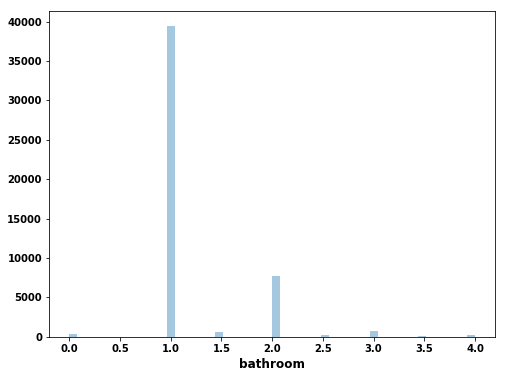

In [7]:
llimit_bath = np.percentile(train_df.bathrooms.values, 0.3)
ulimit_bath = np.percentile(train_df.bathrooms.values, 99.7)
train_df['bathrooms'].loc[train_df['bathrooms']<llimit_bath] = llimit_bath
train_df['bathrooms'].loc[train_df['bathrooms']>ulimit_bath] = ulimit_bath

plt.figure(figsize=(8,6))
sns.distplot(train_df.bathrooms.values, bins=50, kde=False)
plt.xlabel('bathroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

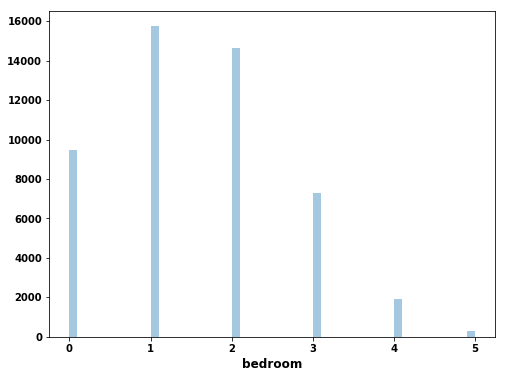

In [8]:
llimit_bed = np.percentile(train_df.bedrooms.values, 0.3)
ulimit_bed = np.percentile(train_df.bedrooms.values, 99.7)
train_df['bedrooms'].loc[train_df['bedrooms']<llimit_bed] = llimit_bed
train_df['bedrooms'].loc[train_df['bedrooms']>ulimit_bed] = ulimit_bed

plt.figure(figsize=(8,6))
sns.distplot(train_df.bedrooms.values, bins=50, kde=False)
plt.xlabel('bedroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

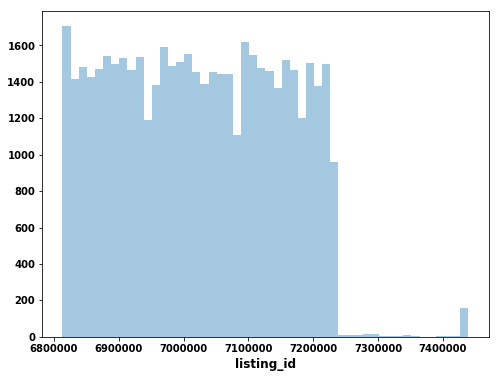

In [9]:
llimit_lid = np.percentile(train_df.listing_id.values, 0.3)
ulimit_lid = np.percentile(train_df.listing_id.values, 99.7)
train_df['listing_id'].loc[train_df['listing_id']<llimit_lid] = llimit_lid
train_df['listing_id'].loc[train_df['listing_id']>ulimit_lid] = ulimit_lid

plt.figure(figsize=(8,6))
sns.distplot(train_df.listing_id.values, bins=50, kde=False)
plt.xlabel('listing_id', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

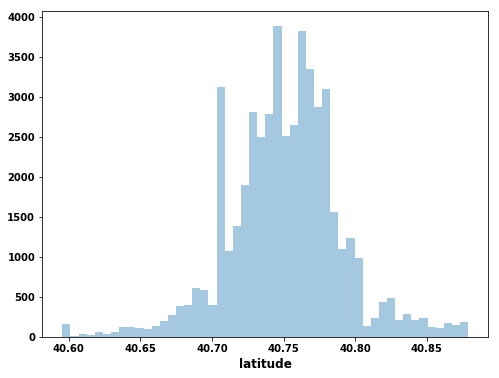

In [10]:
llimit_la = np.percentile(train_df.latitude.values, 0.3)
ulimit_la = np.percentile(train_df.latitude.values, 99.7)
train_df['latitude'].loc[train_df['latitude']<llimit_la] = llimit_la
train_df['latitude'].loc[train_df['latitude']>ulimit_la] = ulimit_la

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

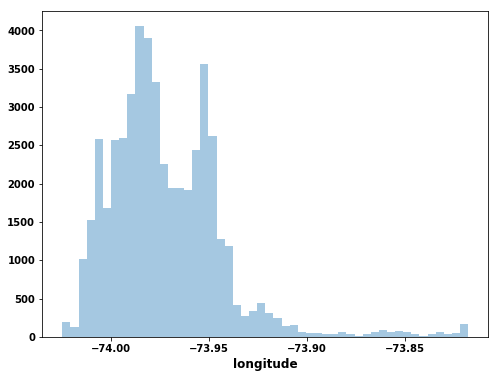

In [11]:
llimit_lo = np.percentile(train_df.longitude.values, 0.3)
ulimit_lo = np.percentile(train_df.longitude.values, 99.7)
train_df['longitude'].loc[train_df['longitude']<llimit_lo] = llimit_lo
train_df['longitude'].loc[train_df['longitude']>ulimit_lo] = ulimit_lo

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


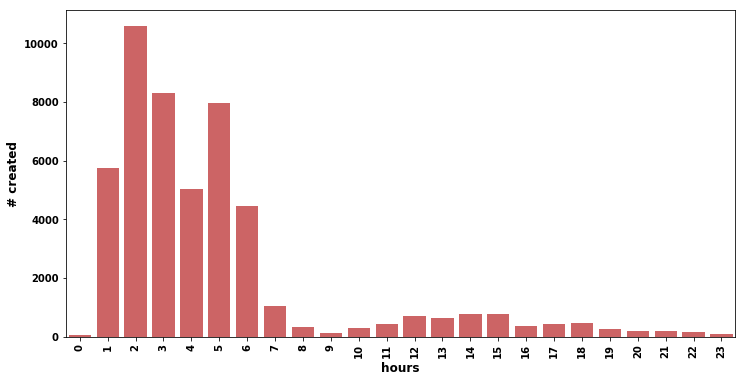

In [12]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["hour_created"] = train_df["created"].dt.hour
hour = train_df['hour_created'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(hour.index, hour.values, alpha=0.8, color=color[3])
plt.xlabel('hours', fontsize=12, fontweight='bold')
plt.ylabel('# created', fontsize=12, fontweight='bold')
plt.xticks(rotation='vertical', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [13]:
top5 = hour[:5]
print("Busiest 5:\n",top5)

('Busiest 5:\n', 2    10596
3     8318
5     7954
1     5749
4     5021
Name: hour_created, dtype: int64)


In [14]:
######################################################################################################
# Missing Values
######################################################################################################

In [15]:
train_df = pd.read_json("train.json")
#train_df.head(50)

In [16]:
#bedrooms

whichrow = 0
count = 0
for row in train_df['bedrooms']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'bedrooms'] = 1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#rain_df.head(10)


('number of missing values: ', 9475)


In [17]:
#bathrooms

whichrow = 0
count = 0
for row in train_df['bathrooms']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'bathrooms'] = 1.0
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(10)


('number of missing values: ', 313)


In [18]:
#building_id

whichrow = 0
count = 0
for row in train_df['building_id']:
    if row=='0':
        count+=1
        #train_df.loc[train_df.index[whichrow], 'building_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(30)

('number of missing values: ', 8286)


In [19]:
#description

whichrow = 0
count = 0
for row in train_df['description']:
    if  any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'description'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3336)


In [20]:
#features

whichrow = 0
count = 0
for row in train_df['features']:
    if row==[]:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'features'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3218)


In [21]:
#print (train_df.isnull().values.any())

In [22]:
#print (train_df.isnull().sum().sum())

In [23]:
#created

whichrow = 0
count = 0
for row in train_df['created']:
    if row==0 :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'created'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [24]:
#display_address

whichrow = 0
count = 0
for row in train_df['display_address']:
    if any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'display_address'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 141)


In [25]:
#street_address

whichrow = 0
count = 0
for row in train_df['street_address']:
    if any(c.isalpha() for c in row) == False :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'street_address'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 13)


In [26]:
#latitude

whichrow = 0
count = 0
for row in train_df['latitude']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'latitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 12)


In [27]:
#listing_id

whichrow = 0
count = 0
for row in train_df['listing_id']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'listing_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [28]:
#longitude

whichrow = 0
count = 0
for row in train_df['longitude']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'longitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 12)


In [29]:
#manager_id

whichrow = 0
count = 0
for row in train_df['manager_id']:
    if  any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'manager_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [30]:
#photos

whichrow = 0
count = 0
for row in train_df['photos']:
    if  any(isinstance(c,str) for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'photos'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 49352)


In [31]:
#price

whichrow = 0
count = 0
for row in train_df['price']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [32]:
#interest_level

whichrow = 0
count = 0
list= ["low", "medium", "high"]
for row in train_df['interest_level']:
    if row not in list :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'interest_level'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [33]:
print(ulimit_p)
print(llimit_p)
print(min(train_df['price']))

18995.0
1300.0
43


In [34]:
#print( train_df['photos'])

In [35]:
#pd.options.display.max_colwidth = 10

In [36]:
######################################################################################################
# Outliers (NEED BOX GRAPHS TO VISUALIZE OUTLIERS)
######################################################################################################

In [37]:
whichrow = 0
count =0
for row in train_df['price']:
    if row<llimit_p or row>ulimit_p:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)

        

('number of outliers: ', 275)


In [38]:
whichrow = 0
count =0
for row in train_df['latitude']:
    if row<llimit_la or row>ulimit_la:
        #train_df.loc[train_df.index[whichrow], 'latitude'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)


('number of outliers: ', 289)


In [39]:
whichrow = 0
count =0
for row in train_df['longitude']:
    if row<llimit_lo or row>ulimit_lo:
        #train_df.loc[train_df.index[whichrow], 'longitude'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)


('number of outliers: ', 298)


In [40]:
whichrow = 0
count =0
for row in train_df['bathrooms']:
    if row<llimit_bath or row>ulimit_bath:
    #if row<llimit_bath or row>ulimit_bath:
        #train_df.loc[train_df.index[whichrow], 'bathrooms'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)

('number of outliers: ', 61)


In [41]:
whichrow = 0
count =0
for row in train_df['bedrooms']:
    if row<llimit_bed or row>ulimit_bed:
        #train_df.loc[train_df.index[whichrow], 'bedrooms'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)

('number of outliers: ', 50)


In [42]:
#train_df.head(10)

In [43]:
######################################################################################################
# Ignore this part
######################################################################################################

In [44]:
# type(train_df.description[4])

In [45]:
# train_df.description[9]

In [46]:
# import re
# words = re.split(r'\W+', train_df.description[4])
# #words

In [47]:
#words += (train_df.description[4]).split()
#words

In [48]:
# start_time = time.time()

# whichrow = 0
# words = []
# rowindex=[]
# rowword=[]
# for rows in train_df['description']:
#     words += re.split(r'\W+', train_df.description[train_df.index[whichrow]])
#     #words += (train_df.description[train_df.index[whichrow]]).split()
#     whichrow+=1
#     #if whichrow == 10000:
#         #break
        
# #counting = dict.fromkeys(wordlist,0)

# #for k in words:
# #    print(k)
# #    if k in wordlist:
# #        counting[k] +=1
        
# print("--- %s seconds ---" % (time.time() - start_time))
# #wordlist
# #counting
# #rowspecific


In [49]:
# whichrow = 0
# for rows in train_df['description']:
#     rowindex +=[train_df.index[whichrow]]
#     whichrow+=1

In [50]:
# whichrow = 0
# for rows in train_df['description']:
#     rowword += [re.split(r'\W+', train_df.description[train_df.index[whichrow]])]
#     whichrow+=1

In [51]:
#wordlist = set(words)
#wordlist

In [52]:
# s = ['all', 'just', 'being', 'over', 'both', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they', 'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't', 'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was', 'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once']

# mentalboom = dict.fromkeys(rowindex, {})
# whichrow = 0 
# for index in rowindex:
#     #mentalboom[index] = dict.fromkeys(wordlist,0)
#     temp0 = set(rowword[whichrow])
#     temp1 = []
#     #print(temp1)
#     for w in temp0:
#         if (len(w)>3) and (w.isdigit() == False) and (w not in s):
#             temp1.append(w)
#     #mentalboom[index] = dict.fromkeys(set(rowword[whichrow]),0)
#     mentalboom[index] = dict.fromkeys(set(temp1),0)
#     whichrow += 1
# #mentalboom[4]

In [53]:

# start_time = time.time()


# #mentalboom = dict.fromkeys(rowspecific, {})
# whichrow = 0
# for index in rowindex:
#     #templist=re.split(r'\W+', train_df.description[index])
#     templist = rowword[whichrow]
#     whichrow+=1
#     #print(templist," --------- end\n")
#     #mentalboom[index] = dict.fromkeys(wordlist,0)
#     for stuff in templist:
#         #print("start: ", stuff, ": end\n")
#         if stuff in mentalboom[index]:
#             mentalboom[index][stuff]+=1
#             #print(mentalboom[index][stuff]," --------- end\n")
#     #print(mentalboom[index]," --------- end\n" , index,"\n")
#     #print(mentalboom[4]," --------- end\n" , 4,"\n")
            

# print("--- %s seconds ---" % (time.time() - start_time))
# #mentalboom

In [54]:
# train_df["description_words"] = train_df.index.map(mentalboom)
# #train_df.head(10)

In [55]:

# top5_des = {}
# for index in train_df.index:
#     top5_des[index] = sorted(mentalboom[index], key=mentalboom[index].get, reverse=True)[:5]
# train_df['top5_words'] = train_df.index.map(top5_des)
# #train_df.head(10)


In [56]:
#train_df.features[9]

In [57]:
######################################################################################################
# Maybe useful? idk
######################################################################################################

In [58]:
s = ['all', 'just', 'being', 'over', 'both', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they', 'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't', 'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was', 'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at', 'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once']

In [59]:
train_df_low = train_df.loc[train_df['interest_level'] == 'low']
#train_df_low

In [60]:
train_df_medium = train_df.loc[train_df['interest_level'] == 'medium']
#train_df_medium

In [61]:
train_df_high = train_df.loc[train_df['interest_level'] == 'high']
#train_df_high 

In [62]:
whichrow = 0
rowindex = []
for rows in train_df_low['description']:
    rowindex +=[train_df_low.index[whichrow]]
    whichrow+=1
    
whichrow = 0
rowword = []
for rows in train_df_low['description']:
    rowword += [re.split(r'\W+', train_df_low.description[train_df_low.index[whichrow]])]
    whichrow+=1
    
mentalboom_low = dict.fromkeys(rowindex, {})
whichrow = 0 
for index in rowindex:
    temp0 = set(rowword[whichrow])
    temp1 = []
    for w in temp0:
        if (len(w)>3) and (w.isdigit() == False) and (w not in s):
            temp1.append(w)
    mentalboom_low[index] = dict.fromkeys(set(temp1),0)
    whichrow += 1
#mentalboom_low[6]

whichrow = 0
for index in rowindex:
    templist = rowword[whichrow]
    whichrow+=1
    for stuff in templist:
        if stuff in mentalboom_low[index]:
            mentalboom_low[index][stuff]+=1
            
train_df_low["description_words"] = train_df_low.index.map(mentalboom_low)
#train_df_low.head(10)

top5_des = {}
for index in train_df_low.index:
    top5_des[index] = sorted(mentalboom_low[index], key=mentalboom_low[index].get, reverse=True)[:5]
train_df_low['top5_words'] = train_df_low.index.map(top5_des)
#train_df_low.head(10)

In [63]:
# print(train_df_low.description_words[6])
# print(train_df_low.description[6])

In [64]:
whichrow = 0
rowindex = []
for rows in train_df_medium['description']:
    rowindex +=[train_df_medium.index[whichrow]]
    whichrow+=1
    
whichrow = 0
rowword = []
for rows in train_df_medium['description']:
    rowword += [re.split(r'\W+', train_df_medium.description[train_df_medium.index[whichrow]])]
    whichrow+=1
    
mentalboom_medium = dict.fromkeys(rowindex, {})
whichrow = 0 
for index in rowindex:
    temp0 = set(rowword[whichrow])
    temp1 = []
    for w in temp0:
        if (len(w)>3) and (w.isdigit() == False) and (w not in s):
            temp1.append(w)
    mentalboom_medium[index] = dict.fromkeys(set(temp1),0)
    whichrow += 1
#mentalboom_medium[4]

whichrow = 0
for index in rowindex:
    templist = rowword[whichrow]
    whichrow+=1
    for stuff in templist:
        if stuff in mentalboom_medium[index]:
            mentalboom_medium[index][stuff]+=1
            
train_df_medium["description_words"] = train_df_medium.index.map(mentalboom_medium)
#train_df_medium.head(10)

top5_des = {}
for index in train_df_medium.index:
    top5_des[index] = sorted(mentalboom_medium[index], key=mentalboom_medium[index].get, reverse=True)[:5]
train_df_medium['top5_words'] = train_df_medium.index.map(top5_des)
#train_df_medium.head(10)

In [65]:
# print(train_df_medium.description_words[4])
# print(train_df_medium.description[4])

In [66]:
whichrow = 0
rowindex = []
for rows in train_df_high['description']:
    rowindex +=[train_df_high.index[whichrow]]
    whichrow+=1
    
whichrow = 0
rowword = []
for rows in train_df_high['description']:
    rowword += [re.split(r'\W+', train_df_high.description[train_df_high.index[whichrow]])]
    whichrow+=1
    
mentalboom_high = dict.fromkeys(rowindex, {})
whichrow = 0 
for index in rowindex:
    temp0 = set(rowword[whichrow])
    temp1 = []
    for w in temp0:
        if (len(w)>3) and (w.isdigit() == False) and (w not in s):
            temp1.append(w)
    mentalboom_high[index] = dict.fromkeys(set(temp1),0)
    whichrow += 1
#mentalboom_high

whichrow = 0
for index in rowindex:
    templist = rowword[whichrow]
    whichrow+=1
    for stuff in templist:
        if stuff in mentalboom_high[index]:
            mentalboom_high[index][stuff]+=1
            
train_df_high["description_words"] = train_df_high.index.map(mentalboom_high)
#train_df_high.head(10)

top5_des = {}
for index in train_df_high.index:
    top5_des[index] = sorted(mentalboom_high[index], key=mentalboom_high[index].get, reverse=True)[:5]
train_df_high['top5_words'] = train_df_high.index.map(top5_des)
#train_df_high.head(10)

In [67]:
 print(train_df_high.description_words[93])
 print(train_df_high.description[93])

{u'used': 1, u'KW150743': 1, u'features': 1, u'office': 1, u'hardwood': 1, u'storage': 1, u'queen': 1, u'Greatcloset': 1, u'accommodate': 1, u'tons': 1, u'andmore': 1, u'Sunset': 2, u'Pets': 1, u'bedroom': 1, u'Rare': 1, u'shopping': 1, u'Sorry': 1, u'fine': 1, u'3large': 1, u'kitchen': 1, u'king': 1, u'apartment': 1, u'room': 1, u'floors': 1, u'space': 1, u'Park': 2, u'modern': 1, u'Townhouse': 1, u'spaciousbackyard': 1, u'dining': 1, u'train': 1, u'Appliances': 1, u'Bedroom': 1, u'Backyard': 1, u'This': 1, u'Locatednear': 1}
Rare! Sunset Park Townhouse 3 Bedroom with Backyard!This apartment features a modern kitchen with New Appliances, 3large bedroom that can accommodate a king or queen bed, a spaciousbackyard, mud room that can be used as an office or storage, Greatcloset space, hardwood floors, and more! Sorry No Pets! Locatednear the D train, Sunset Park, tons of shopping, fine dining, andmore!<br><br><br><br><br><br><br>KW150743


In [68]:
######################################################################################################
# Feature Extraction for Text
######################################################################################################

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

## find more "interesting" words and tranform to vector

In [70]:
whichrow = 0
words=[]
text_low = []
for rows in train_df_low['description']:
    text_low.append(train_df_low['description'][train_df_low.index[whichrow]]) 
    whichrow+=1
#text_low


In [71]:
vectorizer_low = TfidfVectorizer()
vectorizer_low.fit(text_low)
#print(vectorizer_low.vocabulary_)
#print(vectorizer_low.idf_)
vector_low = vectorizer_low.transform([text_low[0]])
print(vector_low.shape)
print(vector_low.toarray())


(1, 32014)


In [81]:
print(vector_low.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [72]:
whichrow = 0
text_medium = []
for rows in train_df_medium['description']:
    text_medium.append(train_df_medium['description'][train_df_medium.index[whichrow]]) 
    whichrow+=1
#text_medium

In [73]:
vectorizer_medium = TfidfVectorizer()
vectorizer_medium.fit(text_medium)
#print(vectorizer_medium.vocabulary_)
#print(vectorizer_medium.idf_)
vector_medium = vectorizer_medium.transform([text_medium[0]])
print(vector_medium.shape)
#print(vector_medium.toarray())

(1, 18925)


In [74]:
whichrow = 0
text_high = []
for rows in train_df_high['description']:
    text_high.append(train_df_high['description'][train_df_high.index[whichrow]]) 
    whichrow+=1
#text_high

In [75]:
vectorizer_high = TfidfVectorizer()
vectorizer_high.fit(text_high)
#print(vectorizer_high.vocabulary_)
#print(vectorizer_high.idf_)
vector_high = vectorizer_high.transform([text_high[0]])
print(vector_high.shape)
#print(vector_high.toarray())

(1, 10469)


In [76]:
from sklearn.feature_extraction.text import CountVectorizer

## gives count and tranform to vector

In [77]:
vect_low = CountVectorizer()
vect_low.fit(text_low)
#print(vect_low.vocabulary_)
vec_low = vect_low.transform(text_low)
print(vec_low.shape)
#print(vec_low.toarray())

(34284, 32014)


In [78]:
vect_medium = CountVectorizer()
vect_medium.fit(text_medium)
#print(vect_medium.vocabulary_)
vec_medium = vect_medium.transform(text_medium)
print(vec_medium.shape)
#print(vec_medium.toarray())

(11229, 18925)


In [79]:
vect_high = CountVectorizer()
vect_high.fit(text_high)
#print(vect_low.vocabulary_)
vec_high = vect_high.transform(text_high)
print(vec_high.shape)
#print(vec_low.toarray())

(3839, 10469)
